In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.current_device()

0

In [4]:
torch.cuda.get_device_name(0)

'GeForce GTX 1050 Ti'

In [5]:
torch.cuda.memory_allocated()

0

In [6]:
torch.cuda.memory_cached()

C:\Users\GF63\Anaconda3\lib\site-packages\torch\cuda\memory.py:346: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  FutureWarning)


0

In [7]:
x = torch.FloatTensor([1,2,3])

In [8]:
x.device

device(type='cpu')

In [9]:
y = torch.FloatTensor([5,6,7]).cuda()

In [10]:
y.device

device(type='cuda', index=0)

In [11]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [12]:
dataset = MNIST(root='data0/', download=True, transform=ToTensor())

In [13]:
len(dataset)

60000

In [14]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

image.shape: torch.Size([1, 28, 28])
Label: 0


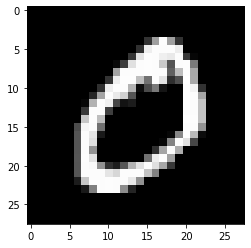

In [15]:
image, label = dataset[1]
print('image.shape:', image.shape)
plt.imshow(image[0], cmap='gray')
print('Label:', label)

image.shape: torch.Size([1, 28, 28])
Label: 5


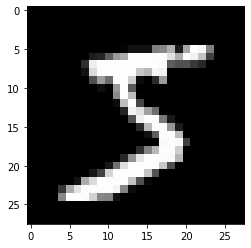

In [16]:
image, label = dataset[0]
print('image.shape:', image.shape)
plt.imshow(image.squeeze(), cmap='gray')
print('Label:', label)

In [17]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(50000, 10000)

In [18]:
batch_size=128

In [19]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

images.shape: torch.Size([128, 1, 28, 28])


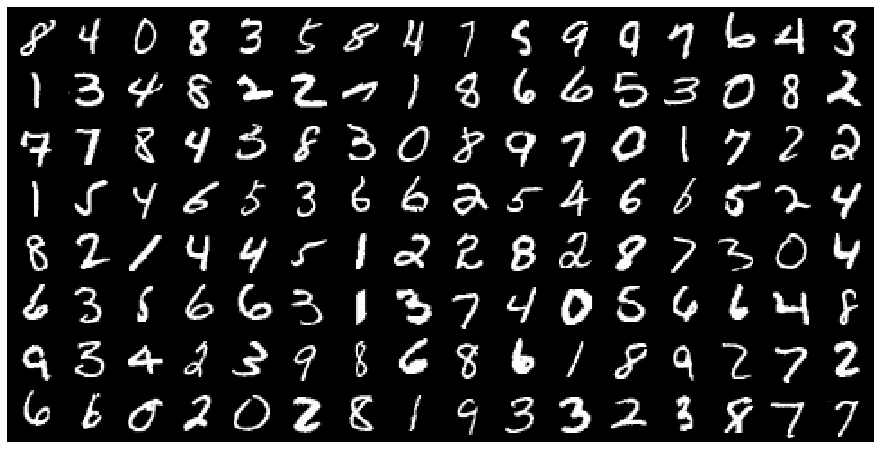

In [20]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

## Hidden Layers, Activation Functions and Non-Linearity

In [21]:
for images, labels in train_loader:
    print('images.shape:', images.shape)
    inputs = images.reshape(-1, 784)
    print('inputs.shape:', inputs.shape)
    break

images.shape: torch.Size([128, 1, 28, 28])
inputs.shape: torch.Size([128, 784])


In [22]:
input_size = inputs.shape[-1]
hidden_size = 32

In [23]:
layer1 = nn.Linear(input_size, hidden_size)

In [24]:
inputs.shape

torch.Size([128, 784])

In [25]:
layer1_outputs = layer1(inputs)
print('layer1_outputs.shape:', layer1_outputs.shape)

layer1_outputs.shape: torch.Size([128, 32])


The image vectors of size 784 are transformed into intermediate output vectors of length 32 by performing a matrix multiplication of inputs matrix with the transposed weights matrix of layer1 and adding the bias. We can verify this using torch.allclose. For a more detailed explanation, review the tutorial on linear regression.

In [26]:
layer1_outputs_direct = inputs @ layer1.weight.t() + layer1.bias
layer1_outputs_direct.shape

torch.Size([128, 32])

In [27]:
torch.allclose(layer1_outputs, layer1_outputs_direct, 1e-3)  #True if 1st and 2nd value are almost as close as 1e-3

True

In [28]:
F.relu(torch.tensor([[1, -1, 0], 
                     [-0.1, .2, 3]]))

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 3.0000]])

In [29]:
relu_outputs = F.relu(layer1_outputs)
print('relu_outputs.shape',relu_outputs.shape)
print('min(layer1_outputs):', torch.min(layer1_outputs).item())
print('min(relu_outputs):', torch.min(relu_outputs).item())

relu_outputs.shape torch.Size([128, 32])
min(layer1_outputs): -0.7532082200050354
min(relu_outputs): 0.0


In [30]:
output_size = 10
layer2 = nn.Linear(hidden_size, output_size)

In [31]:
layer2_outputs = layer2(relu_outputs)
print(layer2_outputs.shape)

torch.Size([128, 10])


In [32]:
inputs.shape

torch.Size([128, 784])

In [33]:
relu_outputs.shape

torch.Size([128, 32])

In [34]:
layer2_outputs.shape

torch.Size([128, 10])

In [35]:
F.cross_entropy(layer2_outputs, labels)

tensor(2.3292, grad_fn=<NllLossBackward>)

In [36]:
# Expanded version of layer2(F.relu(layer1(inputs)))
outputs = (F.relu(inputs @ layer1.weight.t() + layer1.bias)) @ layer2.weight.t() + layer2.bias

In [37]:
torch.allclose(outputs, layer2_outputs, 1e-3)

True

In [38]:
# Same as layer2(layer1(inputs))
outputs2 = (inputs @ layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias

In [39]:
# Create a single layer to replace the two linear layers
combined_layer = nn.Linear(input_size, output_size)

combined_layer.weight.data = layer2.weight @ layer1.weight
combined_layer.bias.data = layer1.bias @ layer2.weight.t() + layer2.bias

In [40]:
# Same as combined_layer(inputs)
outputs3 = inputs @ combined_layer.weight.t() + combined_layer.bias

In [41]:
torch.allclose(outputs2, outputs3, 1e-3)

True

## Model

#### Instead of using a single nn.Linear object to transform a batch of inputs (pixel intensities) into outputs (class probabilities), we'll use two nn.Linear objects. Each of these is called a layer in the network.

#### The first layer (also known as the hidden layer) will transform the input matrix of shape batch_size x 784 into an intermediate output matrix of shape batch_size x hidden_size. The parameter hidden_size can be configured manually (e.g., 32 or 64).

#### We'll then apply a non-linear activation function to the intermediate outputs. The activation function transforms individual elements of the matrix.

#### The result of the activation function, which is also of size batch_size x hidden_size, is passed into the second layer (also known as the output layer). The second layer transforms it into a matrix of size batch_size x 10. We can use this output to compute the loss and adjust weights using gradient descent.

In [42]:
class MnistModel(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size)
        
    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [43]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [44]:
input_size = 784
hidden_size = 32 # you can change this
num_classes = 10

In [45]:
model = MnistModel(input_size, hidden_size=32, out_size=num_classes)

In [46]:
for t in model.parameters():
    print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [47]:
for images, labels in train_loader:
    outputs = model(images)
    break

loss = F.cross_entropy(outputs, labels)
print('Loss:', loss.item())
print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

Loss: 2.313737154006958
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.2019,  0.1815,  0.0398, -0.0083,  0.0191,  0.0280,  0.0051,  0.0954,
          0.1989, -0.0268],
        [ 0.1848,  0.1578, -0.0274,  0.0041,  0.0219,  0.1007,  0.0439,  0.0215,
          0.2141, -0.1583]])


## Using A GPU

In [48]:
torch.cuda.is_available()

True

In [49]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [50]:
device = get_default_device()
device

device(type='cuda')

In [51]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [52]:
for images, labels in train_loader:
    print(images.shape)
    print(images.device)
    images = to_device(images, device)
    print(images.device)
    break

torch.Size([128, 1, 28, 28])
cpu
cuda:0


In [53]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [54]:
#The yield keyword in Python is used to create a generator function that can be used within a for loop, as illustrated below.
def some_numbers():
    yield 10
    yield 20
    yield 30

for value in some_numbers():
    print(value)

10
20
30


In [57]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

In [58]:
for xb, yb in val_loader:
    print('xb.device:', xb.device)
    print('yb:', yb)
    break

xb.device: cuda:0
yb: tensor([1, 9, 4, 1, 5, 6, 0, 3, 6, 8, 6, 4, 7, 8, 0, 0, 4, 5, 6, 1, 9, 6, 8, 5,
        8, 5, 9, 4, 6, 5, 8, 2, 2, 8, 7, 6, 5, 1, 3, 8, 0, 9, 5, 5, 5, 8, 5, 3,
        3, 8, 0, 2, 7, 8, 8, 6, 6, 9, 2, 6, 9, 5, 6, 0, 1, 3, 7, 3, 8, 6, 2, 1,
        3, 7, 2, 9, 3, 5, 9, 2, 0, 3, 7, 5, 1, 1, 0, 7, 9, 1, 4, 0, 0, 6, 9, 3,
        1, 6, 4, 2, 2, 1, 0, 1, 5, 6, 2, 4, 2, 3, 1, 5, 5, 8, 2, 8, 9, 2, 2, 6,
        6, 6, 9, 2, 9, 5, 3, 3, 0, 3, 2, 7, 4, 4, 4, 3, 1, 8, 6, 2, 0, 9, 8, 2,
        9, 9, 6, 2, 9, 1, 3, 9, 9, 6, 8, 9, 6, 8, 6, 0, 4, 4, 4, 5, 0, 3, 0, 3,
        5, 0, 4, 4, 7, 1, 1, 2, 5, 6, 2, 7, 1, 3, 9, 3, 9, 8, 9, 3, 2, 2, 2, 4,
        3, 3, 4, 9, 6, 0, 7, 7, 7, 4, 2, 0, 6, 7, 1, 5, 9, 3, 7, 0, 3, 2, 8, 5,
        5, 0, 3, 6, 5, 1, 0, 2, 8, 8, 1, 6, 8, 2, 9, 9, 2, 8, 1, 7, 1, 4, 5, 0,
        6, 1, 3, 5, 6, 6, 1, 4, 1, 1, 1, 0, 7, 1, 3, 2], device='cuda:0')


## Training the Model

In [59]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Before we train the model, we need to ensure that the data and the model's parameters (weights and biases) are on the same device (CPU or GPU). We can reuse the to_device function to move the model's parameters to the right device.

In [60]:
# Model (on GPU)
model = MnistModel(input_size, hidden_size=hidden_size, out_size=num_classes)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [61]:
#Let's see how the model performs on the validation set with the initial set of weights and biases.
history = [evaluate(model, val_loader)]
history

[{'val_loss': 2.3042871952056885, 'val_acc': 0.09804687649011612}]

The initial accuracy is around 10%, as one might expect from a randomly initialized model (since it has a 1 in 10 chance of getting a label right by guessing randomly).

Let's train the model for five epochs and look at the results. We can use a relatively high learning rate of 0.5.

In [62]:
history += fit(5, 0.5, model, train_loader, val_loader)

Epoch [0], val_loss: 0.2478, val_acc: 0.9280
Epoch [1], val_loss: 0.1790, val_acc: 0.9472
Epoch [2], val_loss: 0.1645, val_acc: 0.9518
Epoch [3], val_loss: 0.1643, val_acc: 0.9531
Epoch [4], val_loss: 0.1360, val_acc: 0.9616


In [63]:
#96% is pretty good! Let's train the model for five more epochs at a lower learning rate of 0.1 to improve the accuracy further.
history += fit(5, 0.1, model, train_loader, val_loader)

Epoch [0], val_loss: 0.1194, val_acc: 0.9684
Epoch [1], val_loss: 0.1176, val_acc: 0.9675
Epoch [2], val_loss: 0.1170, val_acc: 0.9676
Epoch [3], val_loss: 0.1157, val_acc: 0.9688
Epoch [4], val_loss: 0.1166, val_acc: 0.9688


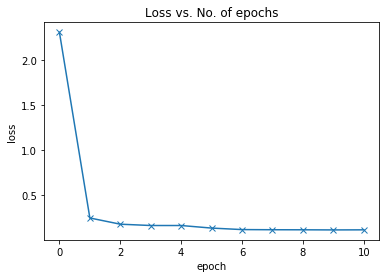

In [64]:
#We can now plot the losses & accuracies to study how the model improves over time.
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

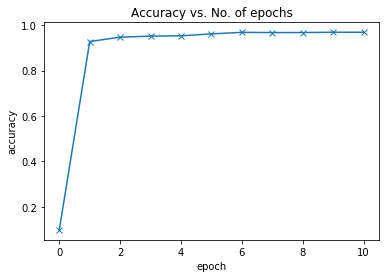

In [65]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

### Our current model outperforms the logistic regression model (which could only achieve around 86% accuracy) by a considerable margin! It quickly reaches an accuracy of 97% but doesn't improve much beyond this. To improve accuracy further, we need to make the model more powerful by increasing the hidden layer's size or adding more hidden layers with activations. I encourage you to try out both these approaches and see which one works better.

## Testing with individual images

In [66]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=ToTensor())

In [67]:
# Let's define a helper function predict_image, which returns the predicted label for a single image tensor.
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


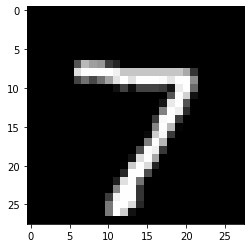

In [68]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 2


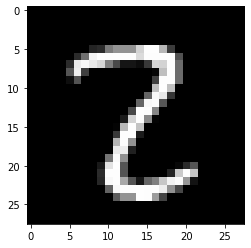

In [69]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


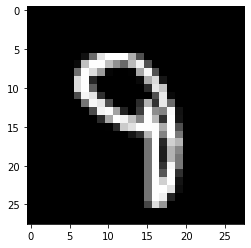

In [70]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [71]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size=256), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.10646269470453262, 'val_acc': 0.9693359136581421}